# 주로 참여하는 체육활동
<div style="display:flex">
    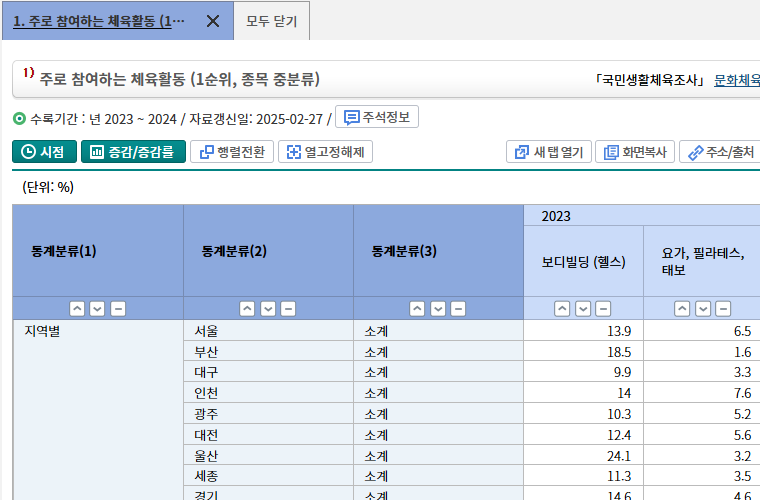

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [44]:
file_path = "./ref/주로_참여하는_체육활동__1순위__종목_중분류__20250228093754.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ["연도", "종목", "남성_10대", "남성_20대", "남성_30대", "여성_10대", "여성_20대", "여성_30대"]
ori = ori.drop([0, 1]).reset_index(drop=True)
ori = ori.set_index("연도")  # '종목' 열을 새로운 인덱스로 설정
ori["남성"] = ori[["남성_10대", "남성_20대", "남성_30대"]].astype(float).sum(axis=1)
ori["여성"] = ori[["여성_10대", "여성_20대", "여성_30대"]].astype(float).sum(axis=1)

ori = ori.drop(columns=["남성_10대", "남성_20대", "남성_30대", "여성_10대", "여성_20대", "여성_30대"])

ori

,종목,남성,여성
연도,,,
2024,걷기(속보 포함),32.6,80.5
2024,보디빌딩 (헬스),69.2,32.9
2024,"요가, 필라테스, 태보",1.1,65.0
2024,등산,3.8,3.0
2024,수영,10.3,19.1
2024,"골프 (그라운드, 파크 포함)",7.1,3.4
2024,"축구, 풋살",38.8,1.3
2024,"자전거,사이클, 산악자전거",13.7,6.1
2024,농구,47.3,4.1


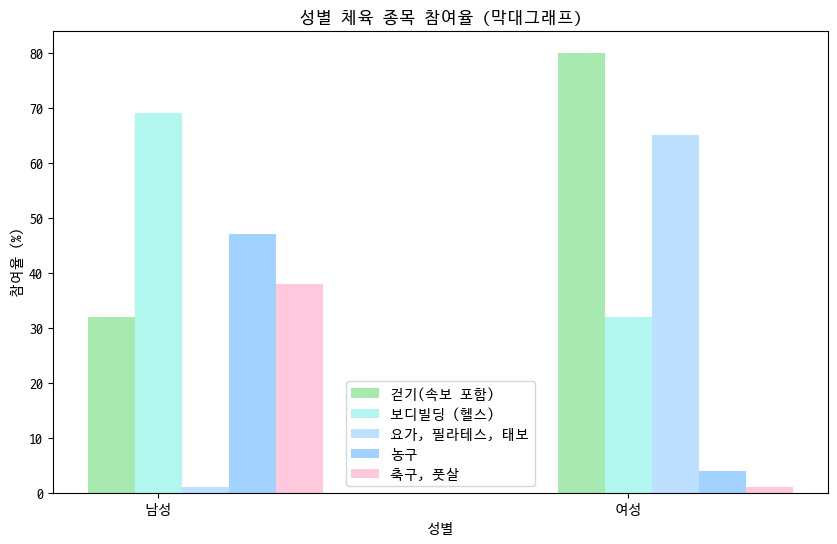

In [52]:
dataCopy = ori.copy()
sports = ["걷기(속보 포함)", "보디빌딩 (헬스)", "요가, 필라테스, 태보", "농구", "축구, 풋살"]
dataResult = dataCopy[dataCopy["종목"].isin(sports)]

fig, ax = plt.subplots(figsize=(10, 6)) # 그래프 크기
x_labels = ["남성", "여성"] # x축 요소
width = 0.1  # 막대 너비 조절
x = range(len(x_labels))  # X축 위치 설정

#colors = ["#FFB3C6", "#FFC3A0", "#FFDBAA", "#FFF5BA", "#C4FCEF"]
colors = ["#A7E9AF", "#B2F7EF", "#BDE0FE", "#A2D2FF", "#FFC8DD"]

for i, (sport, color) in enumerate(zip(sports, colors)):
    sport_data = dataResult[dataResult["종목"] == sport]
    y_data = sport_data[x_labels].values.flatten().astype(int) # 참여율 정수로 변환
    ax.bar([pos + i * width for pos in x], y_data, width=width, label=sport, color=color)

ax.set_xlabel("성별")
ax.set_ylabel("참여율 (%)")
ax.set_title("성별 체육 종목 참여율 (막대그래프)")
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(x_labels)
ax.legend()
plt.savefig('./chart/exerciseData.png')
plt.show()